In [4]:
import matplotlib.pyplot as plt; plt.rcParams["figure.figsize"] = (30,15)
import pandas as pd
import pickle
from src.functions import *
from src.kmeans import KMeans
from sklearn.metrics import rand_score, adjusted_rand_score

In [5]:
# Loading Sample Time Series Data 
with open('./data/sample_data/X.pickle','rb') as file:
    X = pickle.load(file)
with open('./data/sample_data/y.pickle','rb') as file:
    y = pickle.load(file)

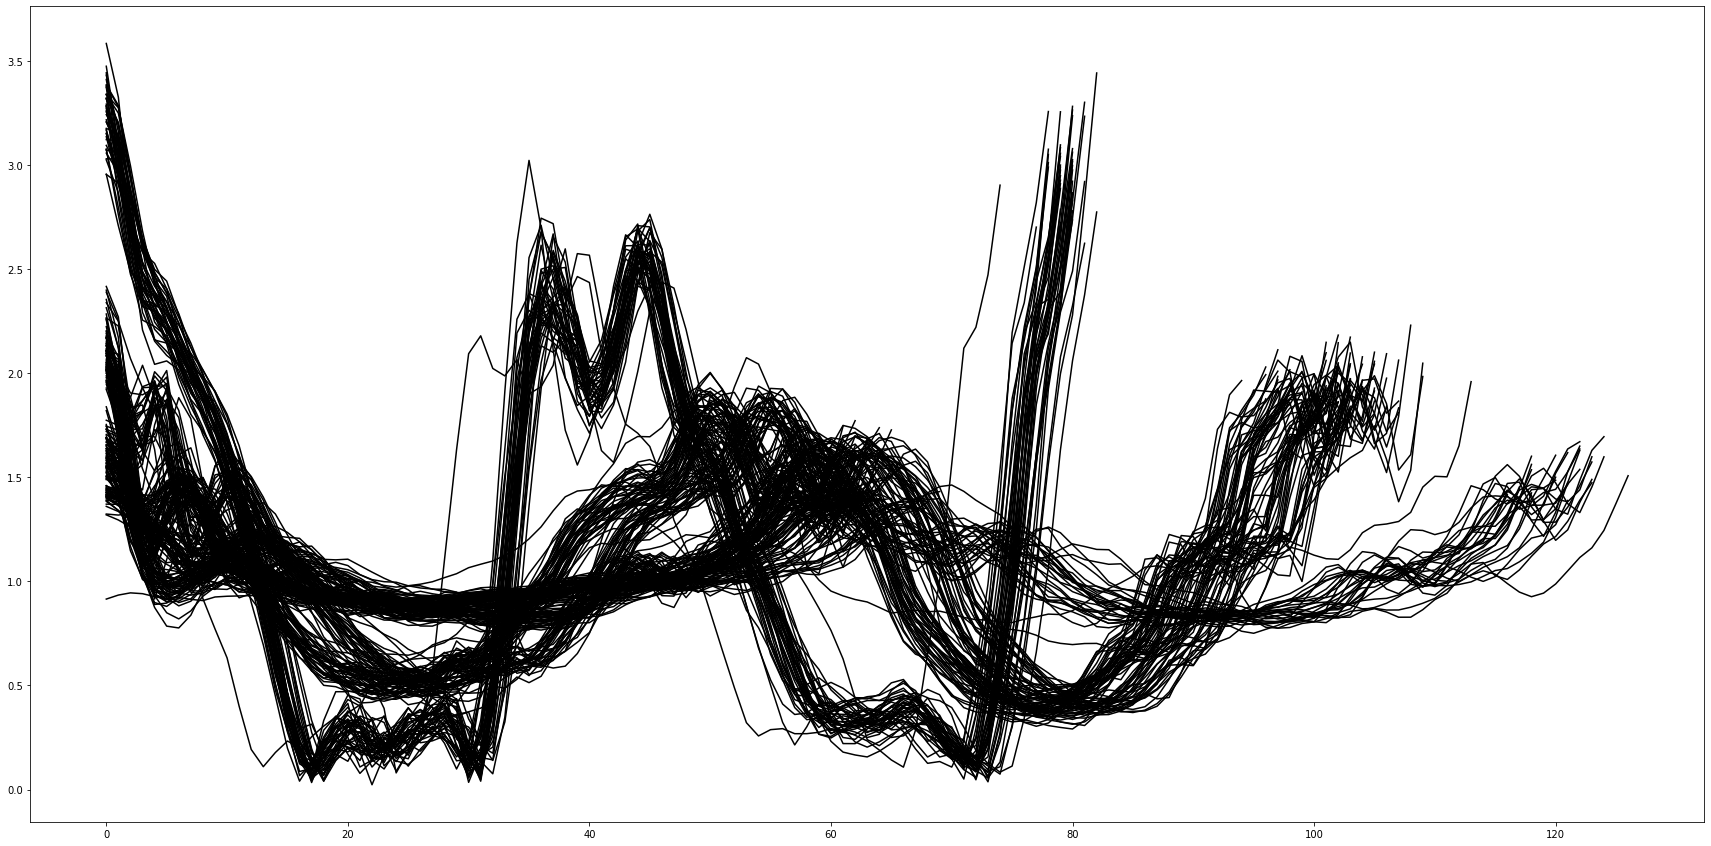

In [6]:
# Plotting sample data

for x in X:
    plt.plot(x, color = 'black');

In [7]:
# Clustering with KMeans

km = KMeans(k_clusters = 3, n_init = 10, max_iter = 100, centroids = [], metric = 'dtw', averaging = 'interpolated')
km.fit(X)

In [8]:
# Calculate the inertia

km._get_inertia()

123.07825486184387

In [9]:
# Using sklearn to evaluate clustering using ground-truth clusters

print('Rand Index:', round(rand_score(km.clusters, y),2))
print('Adjusted RI:', round(adjusted_rand_score(km.clusters, y),2))

Rand Index: 1.0
Adjusted RI: 1.0


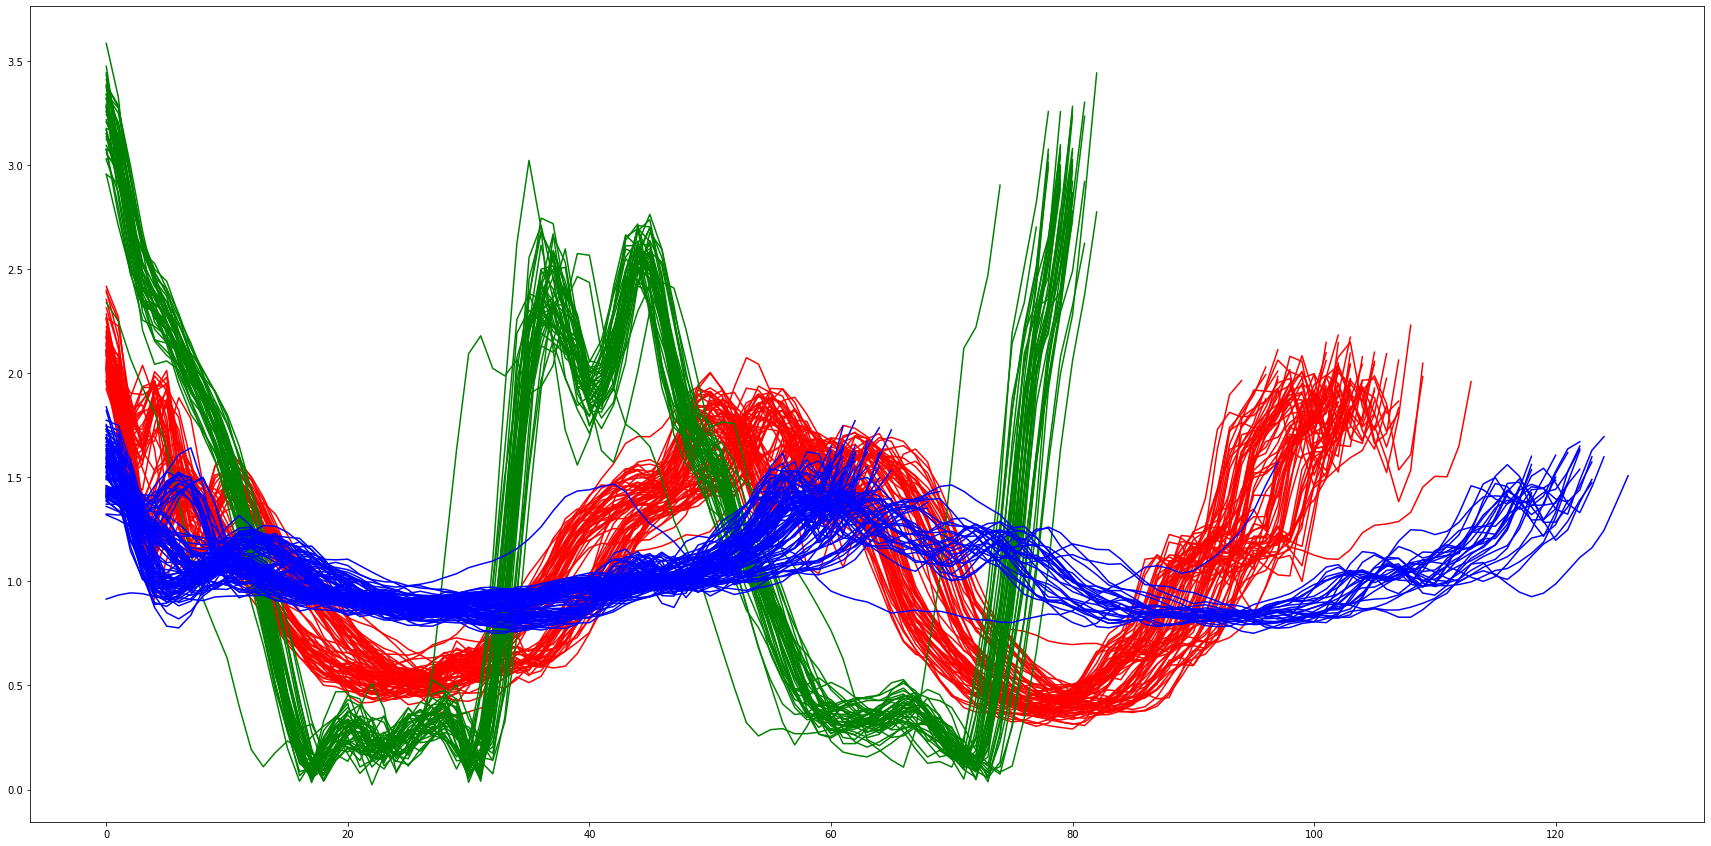

In [10]:
# Access the clusters and centroids attributes

colors = ['red', 'green', 'blue']
for k in range(km.k_clusters):
    cluster = np.array(X, dtype = object)[np.where(np.array(km.clusters) == k)[0]]
    for arr in cluster:
        plt.plot(arr, color = colors[k])

In [11]:
# Soft clustering returns the distance from each instance to each centroid

km.soft_cluster()[:10] # shape: (X.shape[0] x centroids.shape[0])

array([[0.613139  , 0.6128479 , 0.5822532 ],
       [0.63772386, 0.58508501, 0.5581747 ],
       [0.56606151, 0.54914498, 0.62536373],
       [0.62906484, 0.55772854, 0.6498609 ],
       [0.5752172 , 0.66106084, 0.58889783],
       [0.54884494, 0.80600009, 0.67393363],
       [0.59726575, 0.63540768, 0.75822597],
       [0.67397194, 0.6947631 , 0.68421801],
       [0.71466059, 0.67782086, 0.82272691],
       [0.82867005, 1.52961989, 0.82332805]])

In [12]:
# Match an incoming time series array to nearest centroid

print('Clustered Labels:', [km.clusters[0], km.clusters[80]])
print('Predicted Labels:', km.predict([X[0], X[80]]))

Clustered Labels: [0, 1]
Predicted Labels: [0, 1]
